In [1]:
using Turing
using StatsPlots
using DataFrames
using Logging
using CSV

# setting default attributes for plots
default(labels=false)

Code 0.1

In [2]:
println("All models are wrong, but some are useful!")

All models are wrong, but some are useful!


Code 0.2

In [3]:
x = range(1, 2, length=2)
x = x .* 10 .|> log |> sum |> exp
x 

200.0000000000001

Code 0.3

In [4]:
[
    log(0.01^200); 
    200 * log(0.01)
]

2-element Array{Float64,1}:
  -Inf
 -921.0340371976182

Code 0.4

Chains MCMC chain (1000×14×1 Array{Float64,3}):

Iterations        = 501:1:1500
Number of chains  = 1
Samples per chain = 1000
Wall duration     = 5.96 seconds
Compute duration  = 5.96 seconds
parameters        = a, b
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters       mean       std   naive_se      mcse        ess      rhat    ⋯
      Symbol    Float64   Float64    Float64   Float64    Float64   Float64    ⋯

           a   -17.5810    0.4754     0.0150    0.0285   165.7748    1.0000    ⋯
           b     3.9324    0.0293     0.0009    0.0019   161.4736    1.0003    ⋯
                                                                1 column omitted

Quantiles
  parameters       2.5%      25.0%      50.0%      75.0%      97.5% 
      Symbol    Float64    Float64    Float64    Float64    Float64 

  

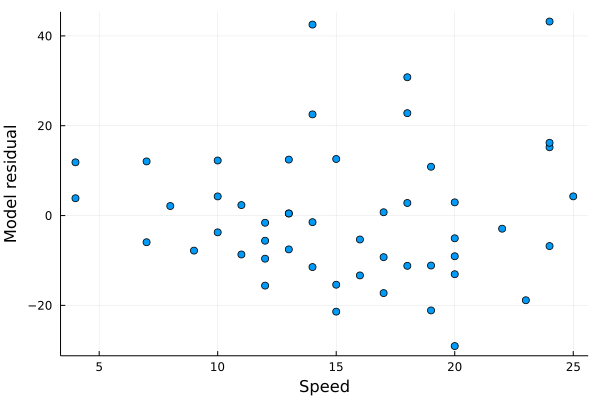

In [5]:
# load data
df = DataFrame(CSV.File("data/cars.csv"));

# fit a linear regression on distance on speed
@model function speed_dist(speed, dist)
    a ~ Uniform(-20, 20)
    b ~ Uniform(1, 5)
    m = a .+ b * speed
    dist ~ MvNormal(m, 1)
end

Logging.disable_logging(Logging.Warn)
chain = sample(speed_dist(df.speed, df.dist), NUTS(0.65), 1000)
display(chain)

# extract mean params
mean_a, mean_b = mean(chain)[:,:mean]

# get residuals of the data
resid = df.dist - (mean_a .+ mean_b * df.speed);
scatter(df.speed, resid; xlabel = "Speed", ylabel = "Model residual")

Code 0.5

In [29]:
import Pkg

Pkg.add(["Turing", "CSV", "DataFrames", "Plots", "StatsPlots"])

  Resolving package versions...
No Changes to `~/work/rethinking/rethinking-2ed-julia/Project.toml`
No Changes to `~/work/rethinking/rethinking-2ed-julia/Manifest.toml`
